# Explore here

In [15]:
# Bibliotecas necesarias

import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random

from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
root_path = '/content'

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
## Appi token
api_token = {"username":"jairoalmanza","key":"4054e3a9b3a8e7c76e969e3fa1132644"}

In [6]:
with open("/root/.kaggle/kaggle.json", "w") as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
# Descargar data
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:04<00:00, 170MB/s]
100% 812M/812M [00:04<00:00, 174MB/s]


In [8]:
# Extraer data de zip
for file in os.listdir():
 if file.endswith(".zip"):
  zip_ref = zipfile.ZipFile(file, "r")
  zip_ref.extractall()
  zip_ref.close()

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
# Define los caminos a los archivos zip
train_zip_path = '/content/train.zip'
test_zip_path = '/content/test1.zip'
# Define los directorios donde se descomprimirán los archivos
train_dir = '/content'
test_dir = '/content'
# Función para descomprimir archivos zip
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
# Descomprime los archivos zip
unzip_file(train_zip_path, train_dir)
unzip_file(test_zip_path, test_dir)

In [20]:
# mover a los directorios correctos
import shutil

# Directorio de origen
train_dir = '../content/train'
# Directorios de destino
dog_dir = os.path.join(train_dir, 'dog')
cat_dir = os.path.join(train_dir, 'cat')
# Crea los subdirectorios si no existen
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)
# Mueve las imágenes a los subdirectorios correspondientes
for filename in os.listdir(train_dir):
    # Ruta completa del archivo
    filepath = os.path.join(train_dir, filename)

    # Verifica que sea un archivo y no un directorio
    if os.path.isfile(filepath):
        if filename.startswith('dog'):
            shutil.move(filepath, os.path.join(dog_dir, filename))
        elif filename.startswith('cat'):
            shutil.move(filepath, os.path.join(cat_dir, filename))

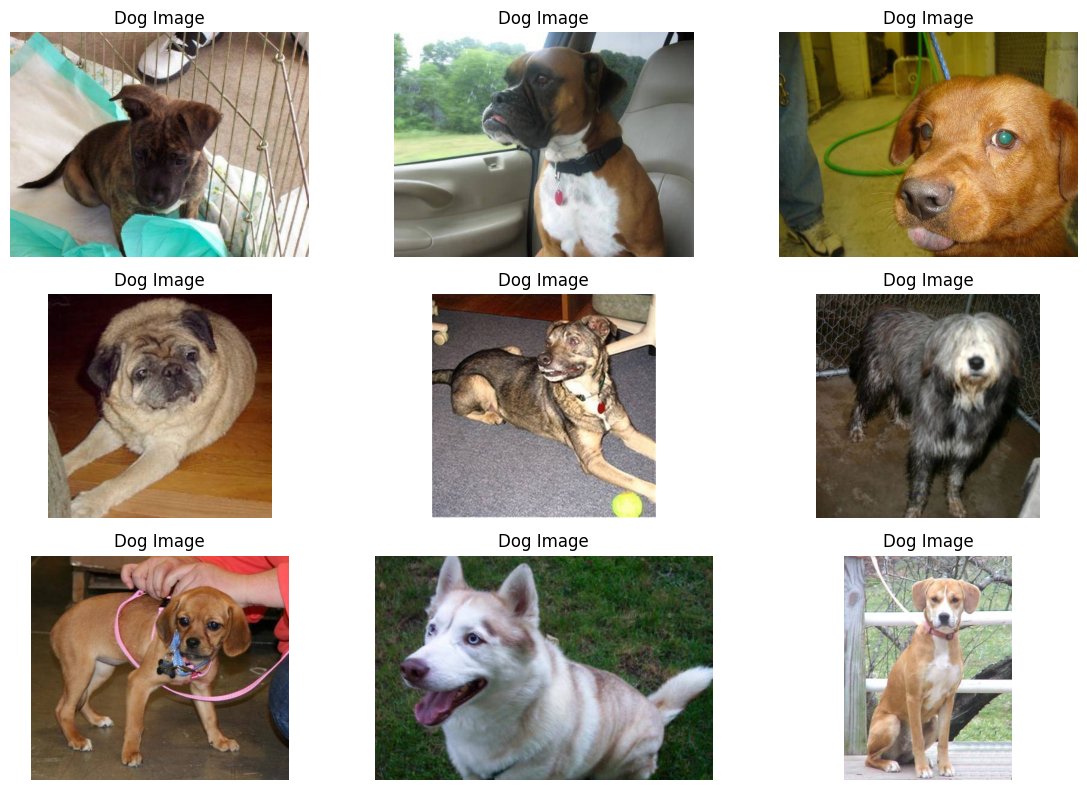

In [22]:
# Importar y comprobar las 9 primeras imágenes de perros

# Ruta al directorio que contiene sus datos de imagen
data_dir = "../content/train"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()